Metin Sınıflandırma

In [27]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import on_islem

In [3]:
df=pd.read_csv("data/metin_siniflandirma.csv",index_col=0)  #dosyayı okuduk
df["Text_2"]=df["Text"].apply(on_islem.pre_processing)  
df["Text_2"]=df["Text_2"].apply(on_islem.remove_space)     #boşlukları kaldırma fonksiyonu
df["Text_3"]=[' '.join(wrd for wrd in x)for x in df["Text_2"]]   #virgülle ayrılmış halini birleştirme

df_index=df[df["Text_2"].str[0].isnull()].index    #boş listeleri silme
df=df.drop(df_index)
df=df.reset_index()
del df["index"]
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, ne, zama, çalıştı, ür, stok, bit, diyor, ...",si ne zama çalıştı ür stok bit diyor mal mı oğ...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, ne, ki, di, bağıracak, kal]",sebep ne ki di bağıracak kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, ne, amk, bu, yıl, çıkar, bu, b...",black friday ne amk bu yıl çıkar bu boku mal m...
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [4]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
msg_train, msg_test, label_train, label_test = train_test_split(df["Text_3"].tolist(),
                                                                df["Label"].tolist(), 
                                                                test_size=0.2, 
                                                                random_state=42)

In [8]:
len(msg_train)

3198

In [9]:
len(msg_test)

800

In [10]:
len(label_train)

3198

In [12]:
df_test=pd.DataFrame({"text":msg_test,'label':label_test})
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [13]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
svm=Pipeline([('vect',TfidfVectorizer()),('svm',LinearSVC())])

In [15]:
svm.fit(msg_train,label_train)
y_pred_class=svm.predict(msg_test)

In [28]:
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, ConfusionMatrixDisplay 

In [17]:
print("svm accuracy score :", accuracy_score(label_test, y_pred_class))

svm accuracy score : 0.9775


In [18]:
print("svm f1 score :", f1_score(label_test,y_pred_class, average="weighted"))

svm f1 score : 0.9775152698970822


In [19]:
len(label_test)

800

In [20]:
800*0.98

784.0

In [30]:
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

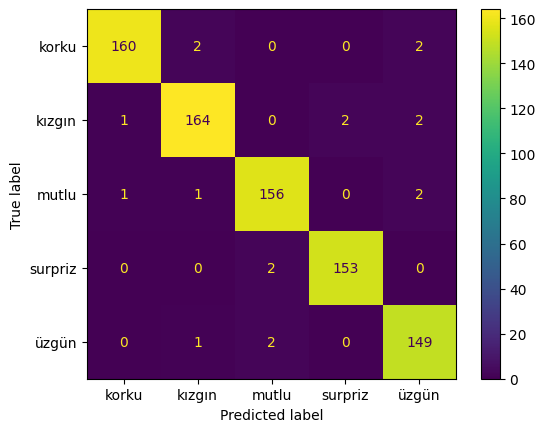

In [29]:
cm=confusion_matrix(label_test, y_pred_class, labels=svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [34]:
# örnek veri testi

msg_test_2=["kötüyüm"]
y_pred_class=svm.predict(msg_test_2)
y_pred_class

array(['üzgün'], dtype='<U7')

In [35]:
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, ne, zama, çalıştı, ür, stok, bit, diyor, ...",si ne zama çalıştı ür stok bit diyor mal mı oğ...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, ne, ki, di, bağıracak, kal]",sebep ne ki di bağıracak kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, ne, amk, bu, yıl, çıkar, bu, b...",black friday ne amk bu yıl çıkar bu boku mal m...
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [37]:
from gensim.models import Word2Vec

model = Word2Vec.load("data/word2vec.model")

model.build_vocab(df["Text_2"].tolist(),update=True)

model.save("data/word2vec.model")

In [38]:
df["word2vec"]=df["Text_2"].apply(on_islem.word2vec)
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.05035147815942764, 0.07184021174907684, 0...."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, ne, zama, çalıştı, ür, stok, bit, diyor, ...",si ne zama çalıştı ür stok bit diyor mal mı oğ...,"[-0.029470136389136314, 0.03802405297756195, 0..."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, ne, ki, di, bağıracak, kal]",sebep ne ki di bağıracak kal,"[-0.04549982771277428, 0.057624053210020065, 0..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, ne, amk, bu, yıl, çıkar, bu, b...",black friday ne amk bu yıl çıkar bu boku mal m...,"[-0.05633914843201637, 0.07989545166492462, 0...."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.014547188766300678, 0.020773082971572876, ..."


In [39]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(),
                                                                df["Label"].tolist(), 
                                                                test_size=0.2, 
                                                                random_state=42)

svm=Pipeline([('svm',LinearSVC())])
svm.fit(msg_train,label_train)
y_pred_class=svm.predict(msg_test)
print("svm accuracy score :", accuracy_score(label_test, y_pred_class))
print("svm f1 score :", f1_score(label_test,y_pred_class, average="weighted"))


svm accuracy score : 0.3925
svm f1 score : 0.3906661223425133


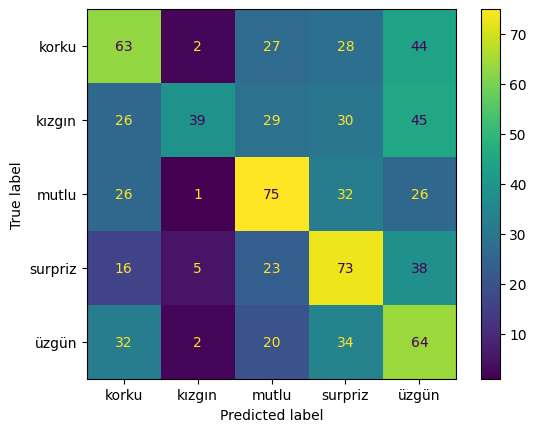

In [40]:
cm=confusion_matrix(label_test, y_pred_class, labels=svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [46]:
from sklearn.neighbors import KNeighborsClassifier

msg_train, msg_test, label_train, label_test = train_test_split(df["Text_3"].tolist(),
                                                                df["Label"].tolist(), 
                                                                test_size=0.2, 
                                                                random_state=42)


knn=Pipeline([('vect',TfidfVectorizer()),('knn',KNeighborsClassifier())])
knn.fit(msg_train,label_train)
y_pred_class=knn.predict(msg_test)

print("knn accuracy score :", accuracy_score(label_test, y_pred_class))
print("knn f1 score :", f1_score(label_test,y_pred_class, average="weighted"))


knn accuracy score : 0.7725
knn f1 score : 0.7724111189890875


In [47]:
len(msg_test)

800

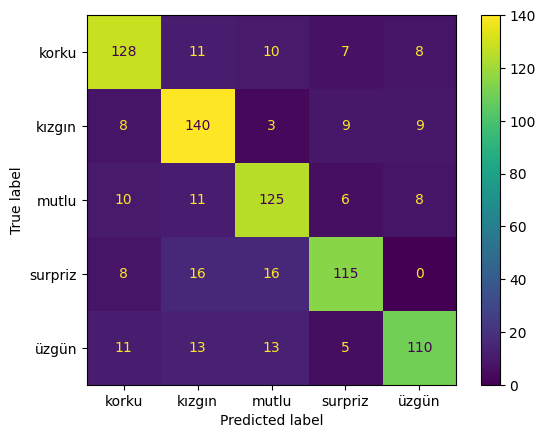

In [48]:
cm=confusion_matrix(label_test, y_pred_class, labels=svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [52]:
from sklearn.neighbors import KNeighborsClassifier

msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(),
                                                                df["Label"].tolist(), 
                                                                test_size=0.2, 
                                                                random_state=42)


knn=Pipeline([('knn',KNeighborsClassifier())])
knn.fit(msg_train,label_train)
y_pred_class=knn.predict(msg_test)

print("knn accuracy score :", accuracy_score(label_test, y_pred_class))
print("knn f1 score :", f1_score(label_test,y_pred_class, average="weighted"))


knn accuracy score : 0.30375
knn f1 score : 0.29672098211246345
